## Speed up your pandas code!

In [1]:
import pandas as pd
import numpy as np

### Creating our dataframe

In [15]:
def get_data():
    df = pd.DataFrame()
    size = 10_000
    df['age'] = np.random.randint(1,100,size)
    df['time_in_bed'] = np.random.randint(0,9,size)
    df['pct_sleeping'] = np.random.rand(size)
    df['favourite_food'] = np.random.choice(['tacos','ice cream','pizza'], size)
    df['hate_food'] = np.random.choice(['capsicum','spinach','beans'], size)
    return df


In [14]:
df.head()

,age,time_in_bed,pct_sleeping,favourite_food,hate_food
0,27,3,0.592964,pizza,beans
1,22,4,0.488367,ice cream,spinach
2,84,0,0.061941,pizza,beans
3,7,6,0.339335,ice cream,beans
4,94,3,0.701047,pizza,capsicum


### The Problem:
Reward Calculation:

* If they were in bed for more than 5 hours AND they were sleeping more than 50% of the time, we give them their favourite food.

  Otherwise, we give them their hate food.

* If they are over 90 years old, we give them their favourite food regardless. 


In [19]:
def reward_calc(row):
    if row['age'] >= 90:
        return row['favourite_food']
    if row['time_in_bed'] > 5 and row['pct_sleeping'] > 0.5:
        return row['favourite_food']
    return row['hate_food']

Using Loops

In [20]:
%%timeit
df = get_data()
for index, row in df.iterrows():
    df: loc[index,'reward'] = reward_calc(row)

798 ms ± 85.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Using apply function

In [23]:
%%timeit
df = get_data()
df['reward'] = df.apply(reward_calc, axis = 1)

317 ms ± 24.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Using Vecotrized functions

In [27]:
%%timeit
df = get_data()
df['reward'] = df['hate_food']

df.loc[((df['time_in_bed'] > 5) & (df['pct_sleeping'] > 0.5)) 
       | (df['age'] >= 90), 'reward'] = df['favourite_food']

12.2 ms ± 592 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Plot Difference

In [30]:
results = pd.DataFrame(
    [
        ['Loop',798,85.3],
        ['Apply_func',317,24.8],
        ['Vectorized',12.2,0.592]
    ],
    columns = ['type','mean','std']
)

<AxesSubplot:title={'center':'Time taken to Run reward_calc'}, xlabel='type'>

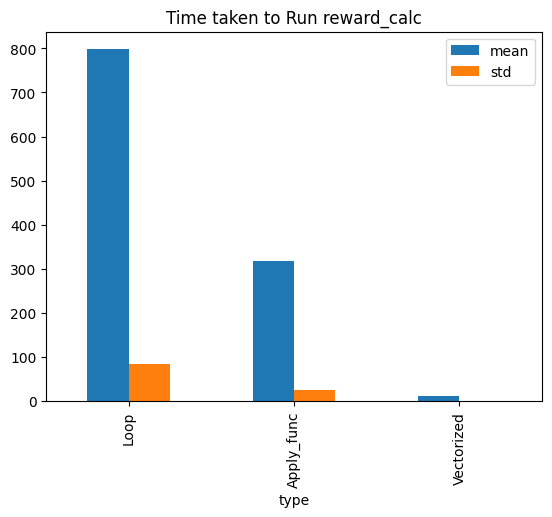

In [34]:
results.set_index('type').plot(kind = 'bar', title = 'Time taken to Run reward_calc')

## Conclusion:
* As we can see, the time it took ot run each reward type, the huge jump was down by changing from loop to apply. But, we can also see that using vectorized functions made it even more faster.
* **Key Conclusin**: Try to use vectoried functions as much as you can when writing functions on pandas.